<a href="https://colab.research.google.com/github/valeria-perezd/1c1002s_semana_tec/blob/main/Reto_A01820157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores NaN por columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Valores NaN después de limpiar:
0


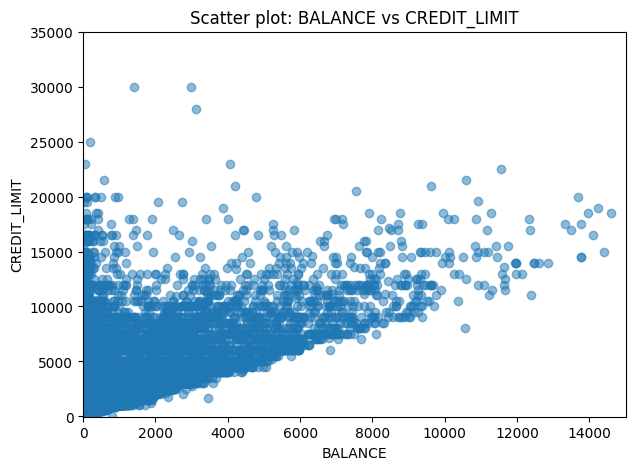

<Figure size 800x600 with 0 Axes>

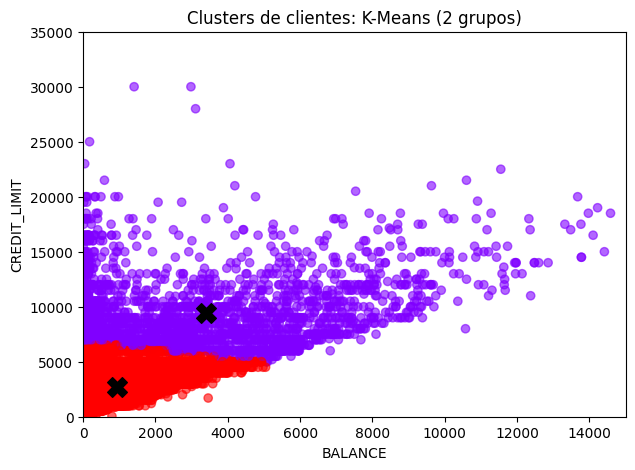

Etiquetas asignadas por K-Means:
[1 0 0 ... 1 1 1]

Centroides de los clusters:
[[3388.77163735 9418.89441187]
 [ 936.46763633 2701.05580828]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("CC GENERAL.csv")

print("Valores NaN por columna:")
print(df.isnull().sum())

df_clean = df.dropna()

print("\nValores NaN después de limpiar:")
print(df_clean.isnull().sum().sum())

X = df_clean[['BALANCE', 'CREDIT_LIMIT']]

plt.figure(figsize=(7,5))
plt.scatter(X['BALANCE'], X['CREDIT_LIMIT'], alpha=0.5)
plt.xlabel("BALANCE")
plt.ylabel("CREDIT_LIMIT")
plt.title("Scatter plot: BALANCE vs CREDIT_LIMIT")
plt.xlim(0, 15000)
plt.ylim(-30, 35000)
df['UTILIZACION'] = df['BALANCE'] / df['CREDIT_LIMIT']
plt.figure(figsize=(8,6))
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


plt.figure(figsize=(7,5))
plt.scatter(X['BALANCE'], X['CREDIT_LIMIT'],
            c=kmeans.labels_, cmap='rainbow', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='X')  # centroides
plt.xlabel("BALANCE")
plt.ylabel("CREDIT_LIMIT")
plt.title("Clusters de clientes: K-Means (2 grupos)")
plt.ylim(0, 35000)  # limitar eje Y para visualizar mejor
plt.xlim(0, 15000)  # limitar eje X para visualizar mejor

plt.show()

print("Etiquetas asignadas por K-Means:")
print(kmeans.labels_)
print("\nCentroides de los clusters:")
print(kmeans.cluster_centers_)

